#### The data was obtained from Kaggle URL: https://www.kaggle.com/competitions/titanic/data?select=gender_submission.csv

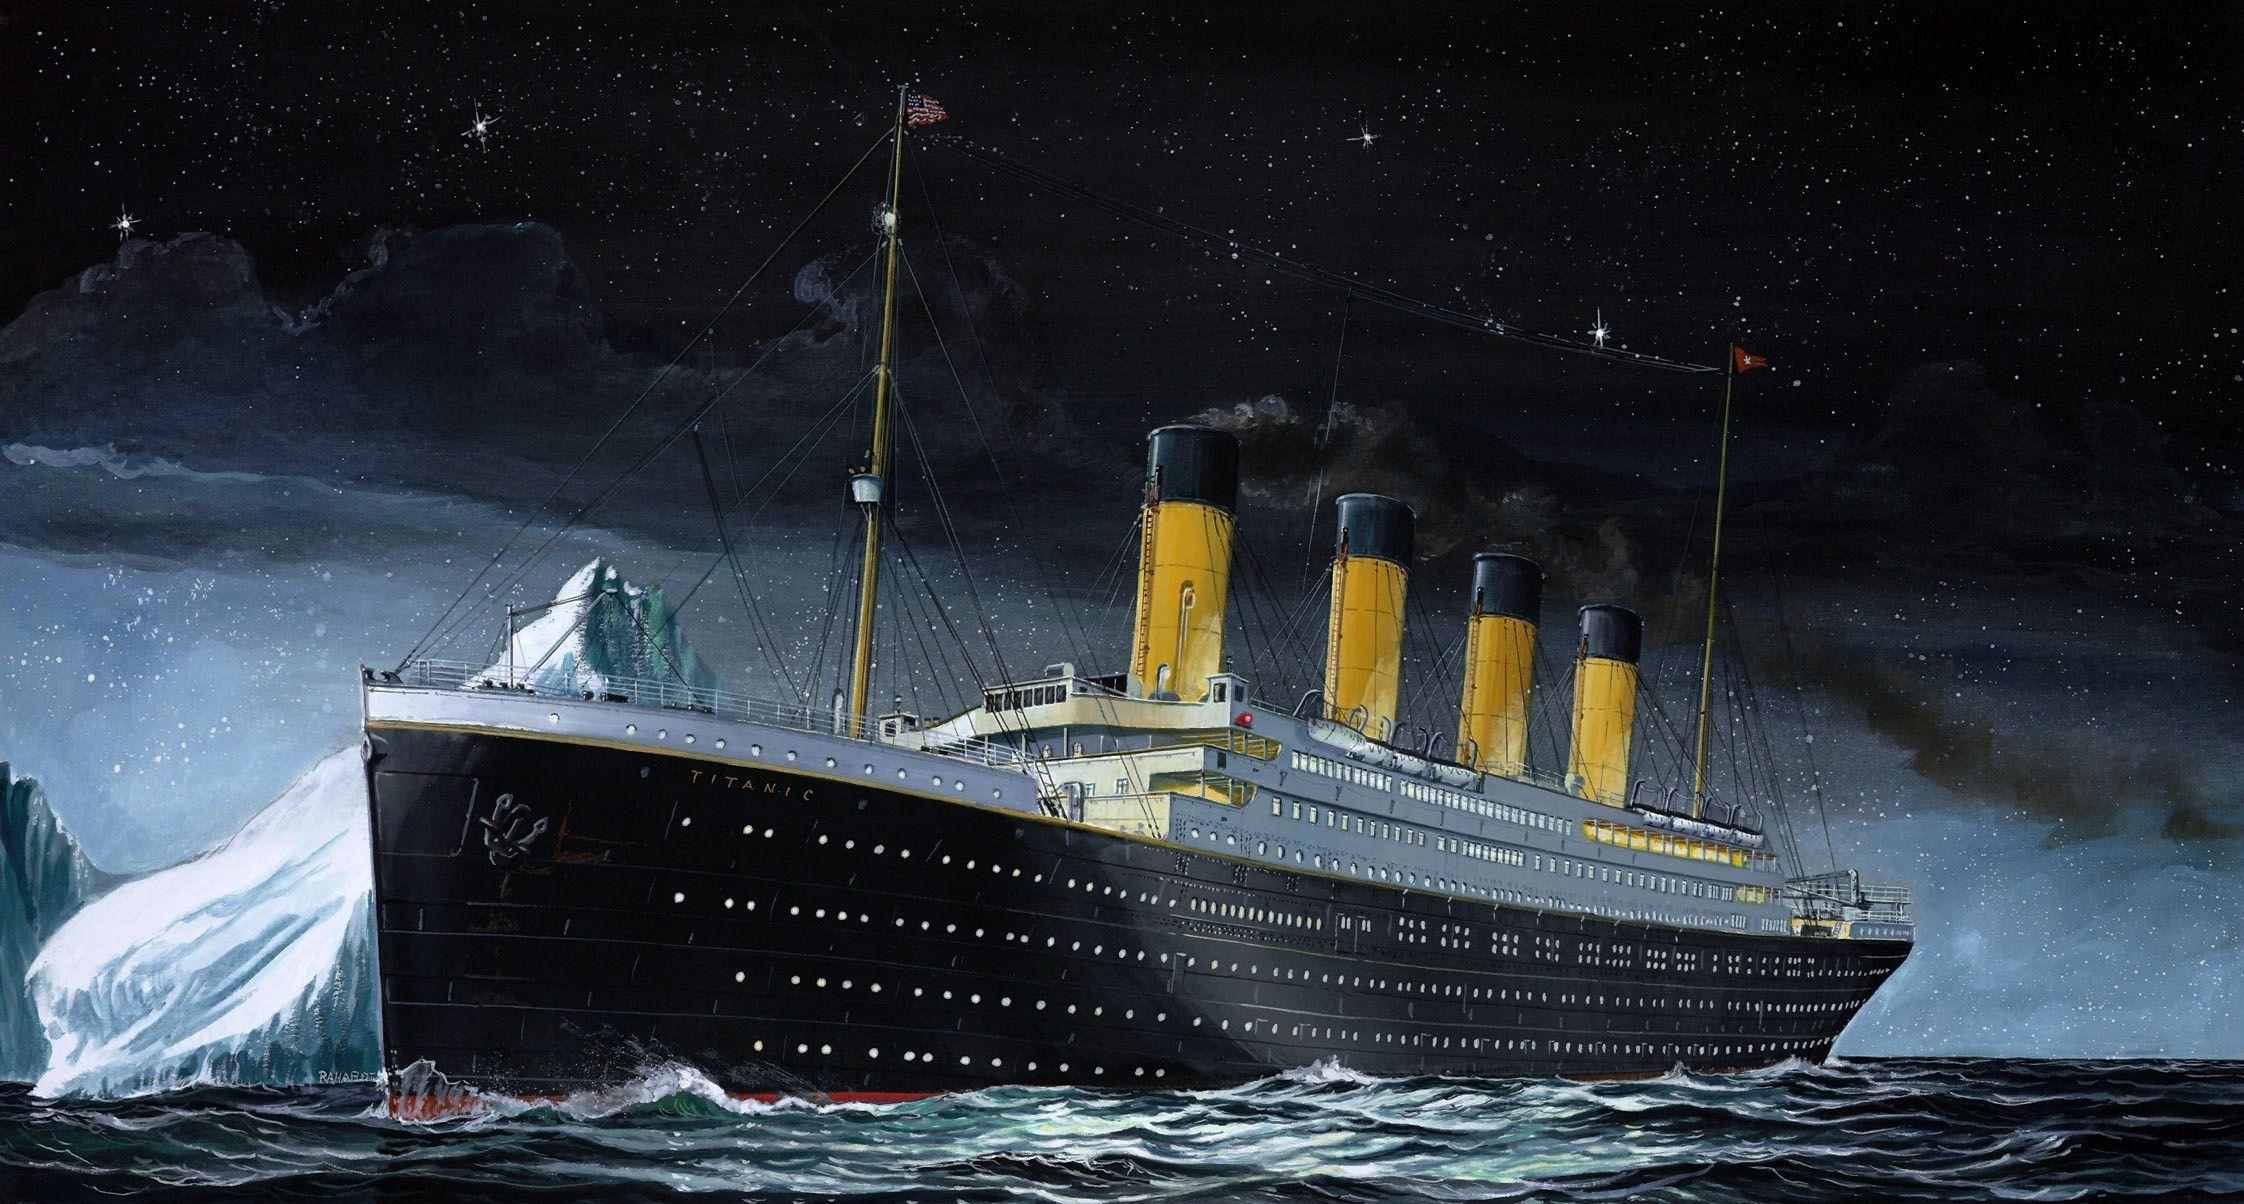

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Titanic-Dataset.csv')

#### What is the survive report for the titanic ship?

In [3]:
columns_to_drop = ["Cabin", "Name", "Ticket", "PassengerId"]
data.drop(columns_to_drop, axis=1, inplace=True)

# How to drop multiple columns 

In [4]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<AxesSubplot:>

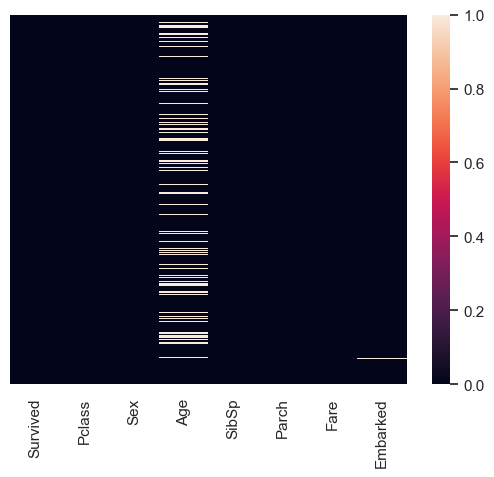

In [7]:
sns.heatmap(data.isnull(), yticklabels = False)

In [8]:
data.dropna(inplace = True)

# dropna to drop the null values

<AxesSubplot:>

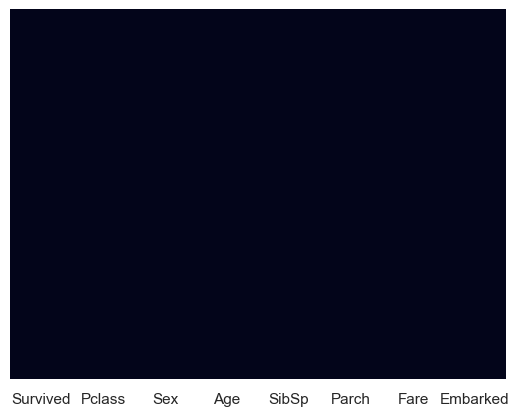

In [9]:
sns.heatmap(data.isnull(), yticklabels = False, cbar = False)

## Data Visualization

In [10]:
print("# of passengers in original data:" +str(len(data.index)))

# of passengers in original data:712


<AxesSubplot:xlabel='Age', ylabel='Count'>

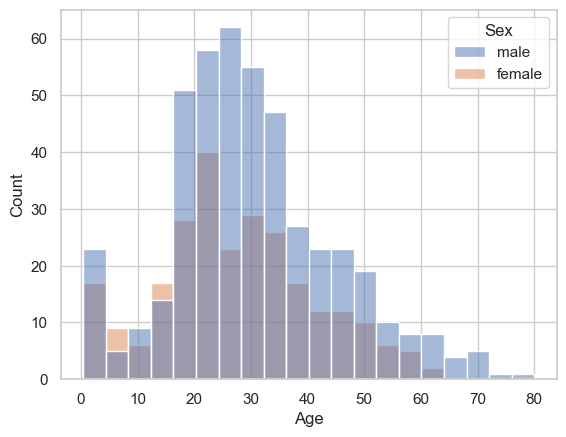

In [11]:
sns.histplot(data=data, x="Age", hue = "Sex")

<AxesSubplot:xlabel='Age', ylabel='Count'>

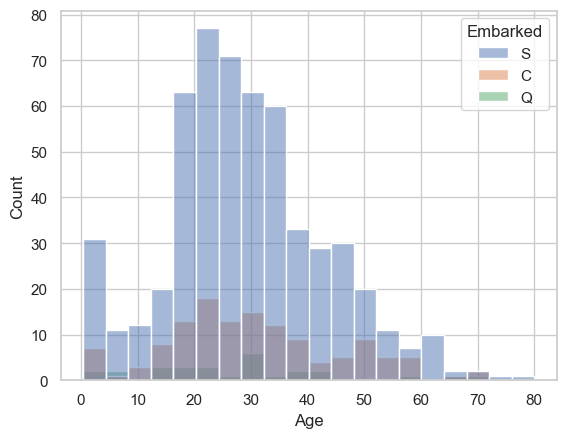

In [12]:
sns.histplot(data=data, x="Age", hue="Embarked")

<AxesSubplot:xlabel='Fare', ylabel='Count'>

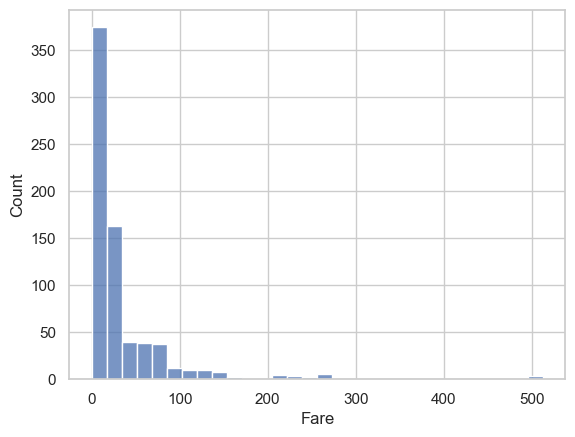

In [13]:
sns.histplot(data=data, x="Fare", bins=30)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

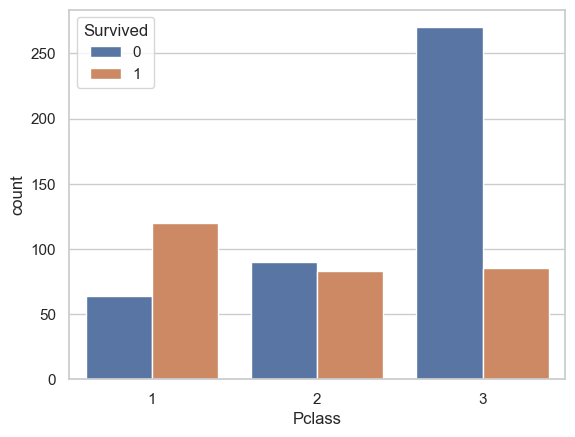

In [14]:
sns.countplot(data=data, x="Pclass", hue="Survived")

In [15]:
gender_counts = data['Sex'].value_counts()
print(gender_counts)

male      453
female    259
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

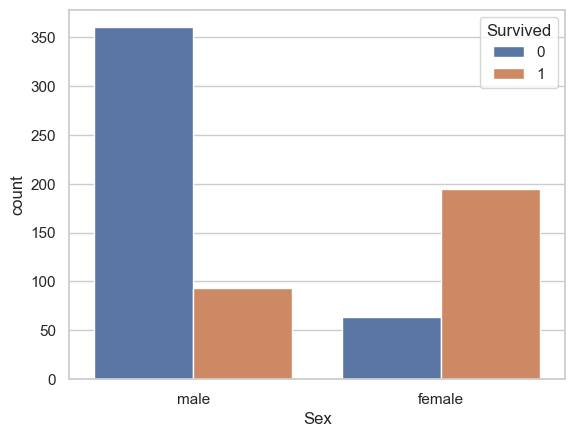

In [16]:
sns.countplot(data=data, x="Sex", hue="Survived")

<AxesSubplot:xlabel='Parch', ylabel='Age'>

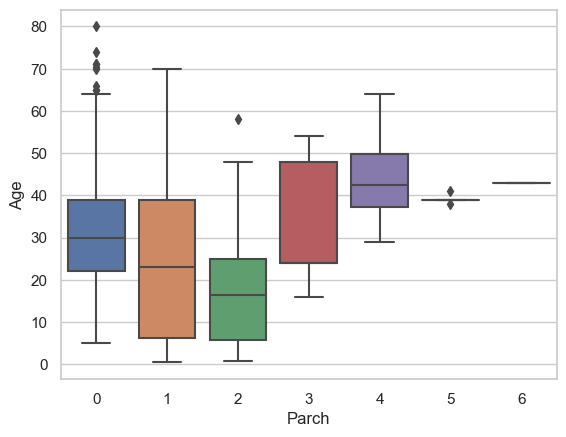

In [17]:
sns.boxplot(data=data, x="Parch", y="Age")

<AxesSubplot:xlabel='Age', ylabel='Fare'>

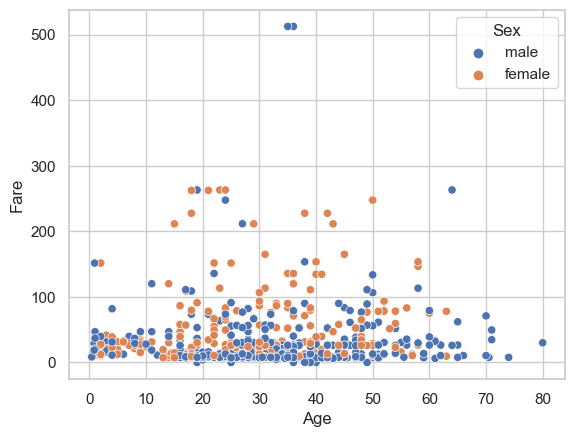

In [18]:
sns.scatterplot(data=data, x="Age", y="Fare", hue="Sex")

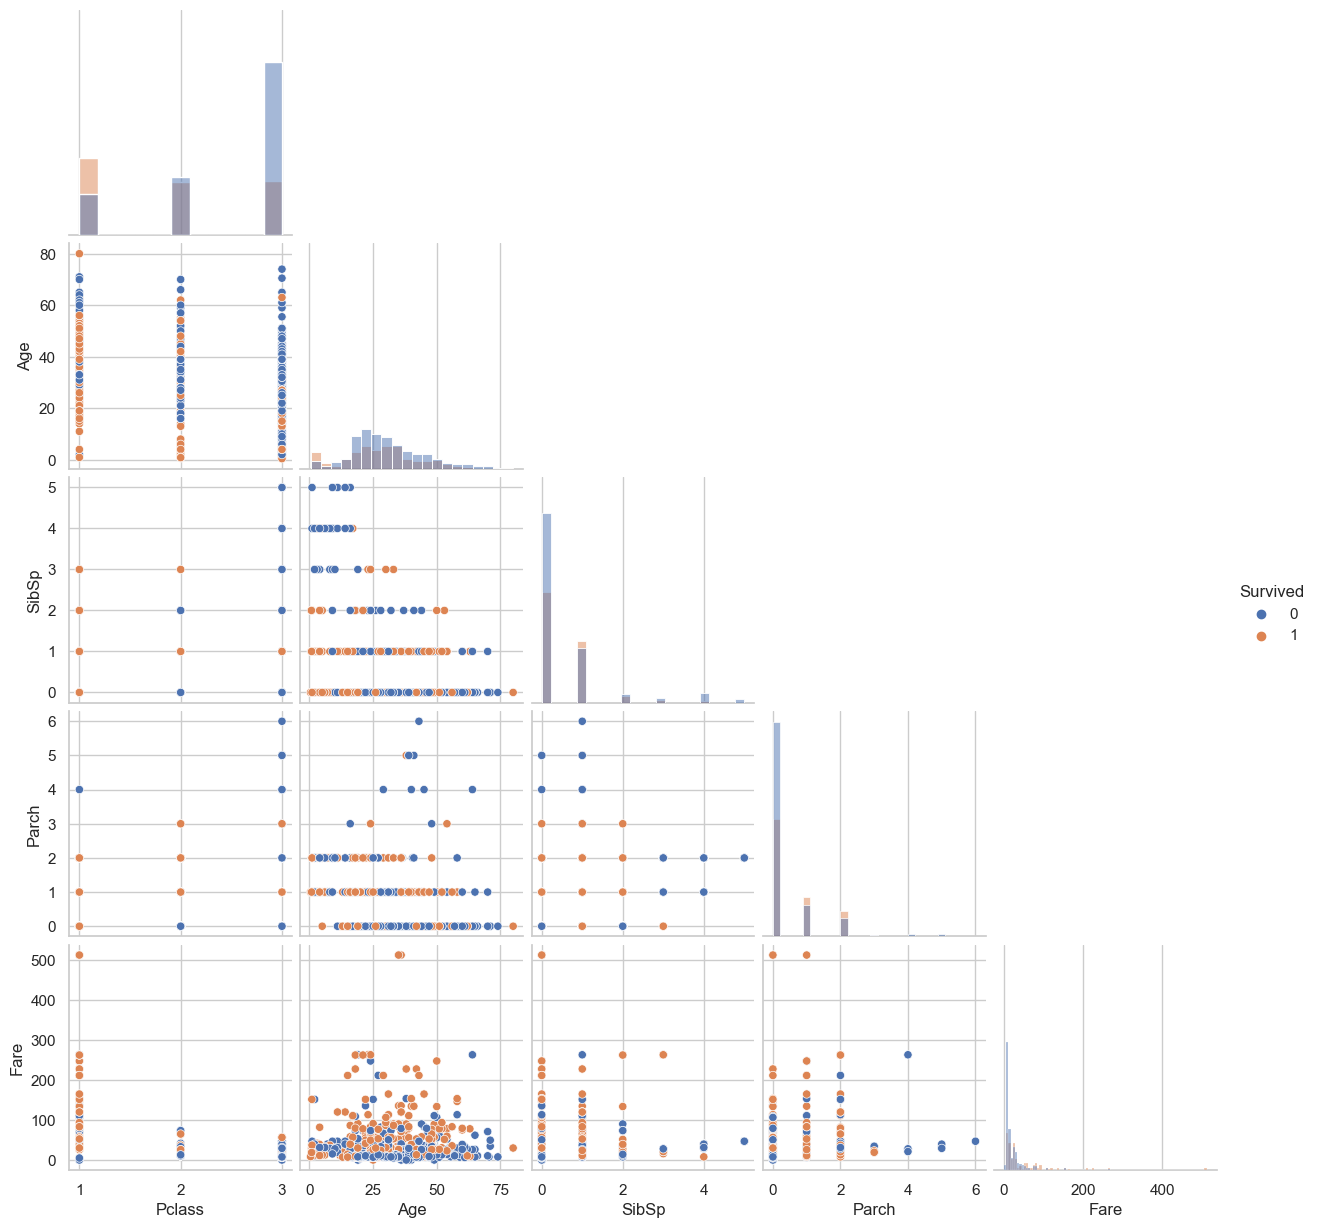

In [19]:
sns.pairplot(data, hue="Survived", diag_kind="hist", corner=True)

### Correlation Matrix

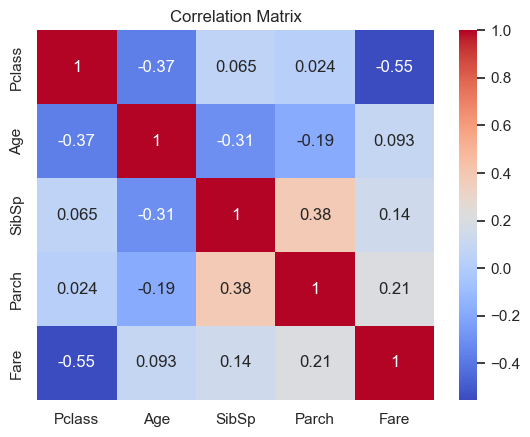

In [20]:
# Heatmap: Correlation Matrix
correlation_matrix = data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Data preprocessing

In [21]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'Sex' column using LabelEncoder
data['Sex'] = label_encoder.fit_transform(data['Sex'])

In [22]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [23]:
# Assuming 'data' is your DataFrame
feature_names = data.columns.tolist()

In [24]:
X = data.drop('Survived', axis=1).values
y = data['Survived'].values

In [25]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

### Split into Training set and Test set

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#### Scaler

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =  sc.transform(X_test)

#### Training the Linear Regression model

In [29]:
from sklearn.linear_model import LogisticRegression
classifier_lg = LogisticRegression(random_state = 0)
classifier_lg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [30]:
y_pred = classifier_lg.predict(X_test)

#### Receiver Operating Characteristic

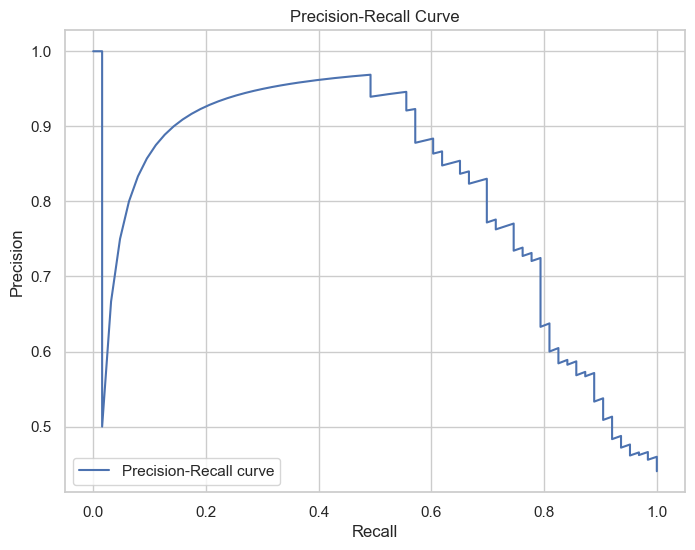

In [31]:
from sklearn.metrics import precision_recall_curve

# Suppose you have your model (lg) and your data (X_test, y_test)
y_scores = classifier_lg.predict_proba(X_test)[:, 1]  # get the probability estimates of the positive class

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

###  Logistic Regression

In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy, precision, recall and f1_score
accuracy_lg = accuracy_score(y_test, y_pred)*100
precision_lg = precision_score(y_test, y_pred)*100
score_lg = f1_score(y_test, y_pred)*100
recall_lg = recall_score(y_test, y_pred)*100

#### Training Naive Bayes model

In [33]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier_nb.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_db = accuracy_score(y_test, y_pred)*100
precision_db = precision_score(y_test, y_pred)*100
score_db = f1_score(y_test, y_pred)*100
recall_db = recall_score(y_test, y_pred)*100

#### Training KNNeighbours model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = classifier_knn.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_knn = accuracy_score(y_test, y_pred)*100
precision_knn = precision_score(y_test, y_pred)*100
score_knn = f1_score(y_test, y_pred)*100
recall_knn = recall_score(y_test, y_pred)*100

#### Training the SVM Kernel model

In [39]:
from sklearn.svm import SVC

# Create SVC instance with probability=True
classifier_svm = SVC(kernel = 'rbf', probability=True, random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(probability=True, random_state=0)

In [40]:
y_pred = classifier_svm.predict(X_test)

In [41]:
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
final.head()

,Acctuate,Predicted
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0


#### Receiver Operating Characteristic

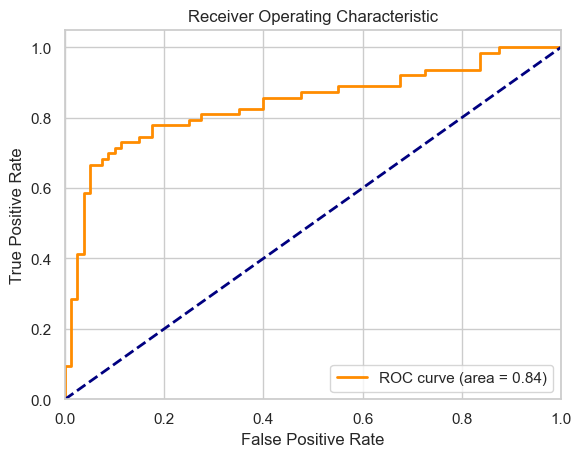

In [42]:
from sklearn.metrics import roc_curve, auc

# Fit the model on the training data
classifier_svm.fit(X_train, y_train)

# Predict the probabilities of the positive class
y_prob = classifier_svm.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

#### Visualizing the Test set

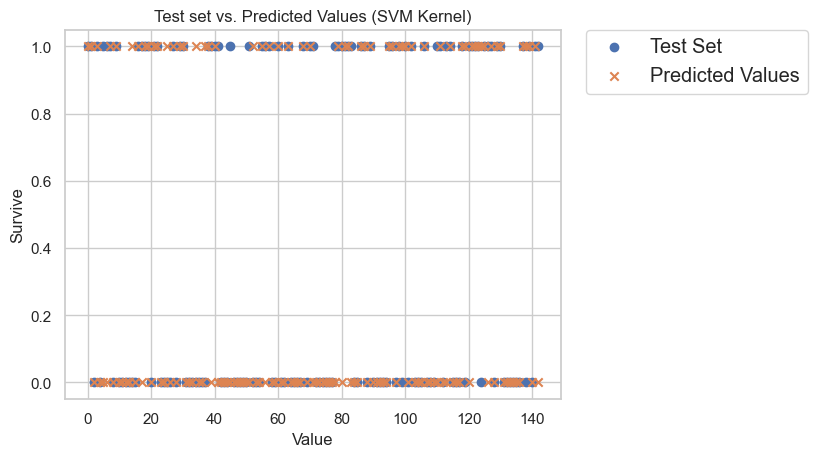

In [43]:
# Plot the true values as a scatter plot
plt.scatter(range(len(y_test)), y_test, label='Test Set', marker='o')

# Plot the predicted values as a scatter plot
plt.scatter(range(len(y_test)), y_pred, label='Predicted Values', marker='x')

plt.xlabel('Value')
plt.ylabel('Survive')
plt.title('Test set vs. Predicted Values (SVM Kernel)')

# Move the legend outside the plot and make it larger
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., fontsize='large')

plt.show()

### Confusion Matrix SVM

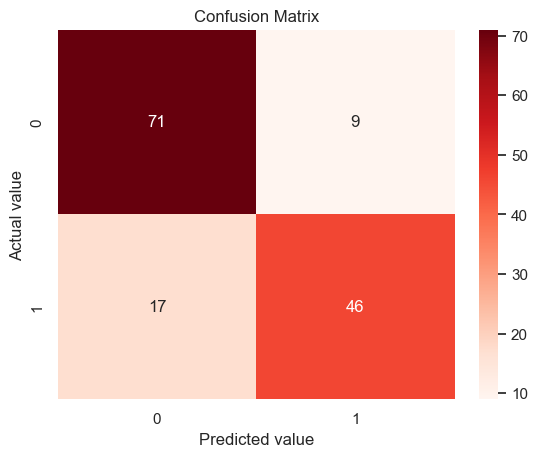

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# calculate accuracy, precision, recall and f1_score
accuracy_svm = accuracy_score(y_test, y_pred)*100
precision_svm = precision_score(y_test, y_pred)*100
score_svm = f1_score(y_test, y_pred)*100
recall_svm = recall_score(y_test, y_pred)*100

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix using seaborn
sns.heatmap(cm, annot=True, cmap="Reds")

# Set labels and title
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

## Comparing models

In [45]:
# Define the model names and accuracy values
model_names = ['Logistic Regression', 'Naive Bayes', 'SVM Kernel', 'KNNeighbours']
accuracy_values = [accuracy_lg, accuracy_db, accuracy_svm, accuracy_knn]
precision_values = [precision_lg, precision_db, precision_svm, precision_knn]
f1_score_values = [score_lg, score_db, score_svm, score_knn]
recall_values = [recall_lg, recall_db, recall_svm, recall_knn]

# Create a dictionary with the data
data = {'Model': model_names,
        'Accuracy': accuracy_values,
        'Precision': precision_values,
        'Recall': recall_values,
        'f1_score': f1_score_values}

# Create the DataFrame
df = pd.DataFrame(data)

In [46]:
df

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic Regression,79.720280,85.416667,65.079365,73.873874
1,Naive Bayes,75.524476,71.875000,73.015873,72.440945
2,SVM Kernel,81.818182,83.636364,73.015873,77.966102
3,KNNeighbours,77.622378,80.392157,65.079365,71.929825


## SHAP: Feature Importance

In [47]:
import shap

# Create a smaller subset of background data
background_subset = shap.sample(X_train, 50)

# Create the explainer object with the SVM model and the subset of background data
explainer = shap.KernelExplainer(model=classifier_svm.predict, data=background_subset, link="identity")

# Calculate shap_values for the first 50 instances in X_test
shap_values = explainer.shap_values(X_test[:50])

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/50 [00:00<?, ?it/s]

### Globalize and Localize Feature Visualization

  0%|          | 0/50 [00:00<?, ?it/s]

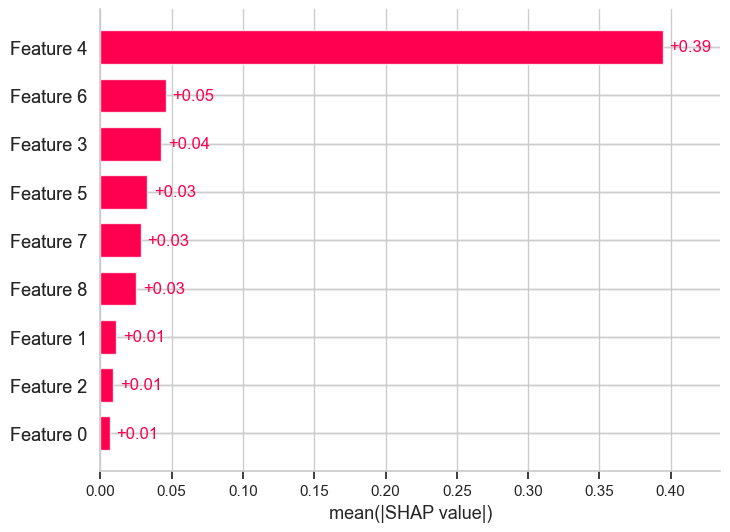

In [48]:
# Summarize the SHAP values in a SHAP values object
shap_values_object = explainer(X_test[:50])

# Create the bar plot
shap.plots.bar(shap_values_object)

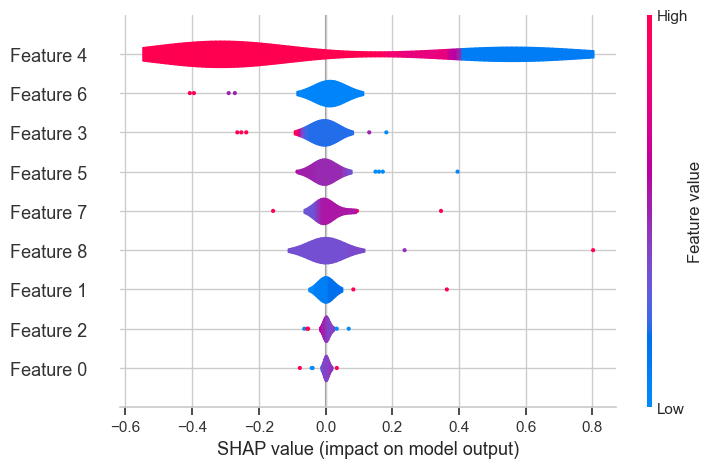

In [49]:
shap.plots.violin(shap_values_object)

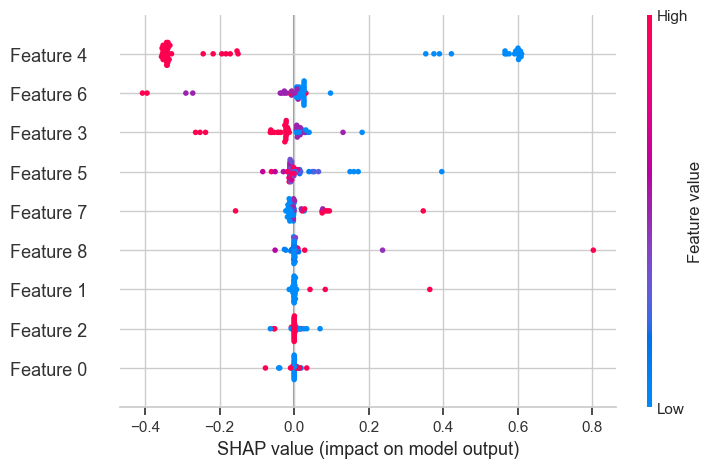

In [50]:
shap.plots.beeswarm(shap_values_object)

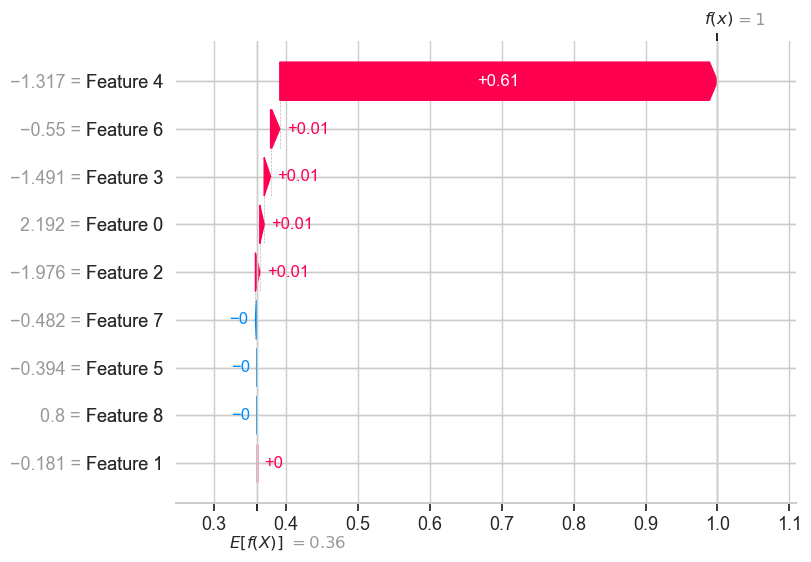

In [51]:
shap.plots.waterfall(shap_values_object[0])

##### SVM Kernel is the best model at an accuracy of 81.8%
##### The most important feature for the building of this model is feature 4.